<a href="https://colab.research.google.com/github/Shashank-gc/python-projects/blob/master/student_admission_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The data set consist of GRE, TOFEL, GPA, Undergrad university and other details of the students who applied for data science admission. We will try to explore the data and see if we can find any relations between the admission variables. Due to privacy matter we will not be displacing the full data**

 *importing modules*



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
df1 = pd.read_excel("admission_analysis.xlsx")

In [172]:
df1[df1.columns[5:]].head()

,University Rating,university rating,Postal,Sex,Admission,Prog Action,Prog Reason,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C)
0,1,IIT or NIIT,506002,M,1,APPL,NaN,,,157,65,297.0,67,134
1,1,IIT or NIIT,500076,F,0,DEIN,NaN,3.081,3.159,163,82,306.5,0,0
2,1,IIT or NIIT,490006,M,2,DDEF,PDR,3.698,4,159,72,312.0,97,194
3,1,IIT or NIIT,530013,M,0,DENY,NaN,2.46,2.574,167,91,330.5,104,208
4,1,IIT or NIIT,506252,F,0,DENY,NaN,2.785,2.885,155,58,294.0,0,0


In [0]:
df1 = df1.drop([' Prog Reason'], axis=1)

In [151]:
df1.columns

Index(['Emplid', 'Last Name', 'First Name', 'Middle Name', 'City',
       'University Rating', 'NAAC_rating', 'Postal', 'Sex', 'Admission',
       'Prog Action', 'GPA (UG Overall)', 'GPA (Last 60)', 'GRE SQUAN (S)',
       'GRE SQUAN (P)', 'GRE TOTAL (C)', 'TOEFL COMPI (S)', 'TOEFL TOTAL (C)'],
      dtype='object')

**In the above column names we can see that there are some trailing spaces so we need to remove those spaces before proceeding with any further analysis** 

In [0]:
df1 = df1.rename(columns=lambda x: x.strip())

In [152]:
df1.columns

Index(['Emplid', 'Last Name', 'First Name', 'Middle Name', 'City',
       'University Rating', 'NAAC_rating', 'Postal', 'Sex', 'Admission',
       'Prog Action', 'GPA (UG Overall)', 'GPA (Last 60)', 'GRE SQUAN (S)',
       'GRE SQUAN (P)', 'GRE TOTAL (C)', 'TOEFL COMPI (S)', 'TOEFL TOTAL (C)'],
      dtype='object')

**Rows of values of data available.**

In [113]:
df1.count().to_frame().T

,Emplid,Last Name,First Name,Middle Name,City,University Rating,university rating,Postal,Sex,Admission,Prog Action,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C)
0,705,705,705,32,705,705,705,692,705,705,705,705,705,705,705,705,705,705


Renaming the columns for ease of access

In [0]:
df1.rename(columns={'University Rating.':'Univrating','GRE Total (C)':'GRE','TOEFL Total (C)':'TOEFL', 'university rating':'NAAC_rating'},inplace=True)

In [173]:
df1[df1.columns[5:]].head()

,University Rating,university rating,Postal,Sex,Admission,Prog Action,Prog Reason,GPA (UG Overall),GPA (Last 60),GRE SQUAN (S),GRE SQUAN (P),GRE TOTAL (C),TOEFL COMPI (S),TOEFL TOTAL (C)
0,1,IIT or NIIT,506002,M,1,APPL,NaN,,,157,65,297.0,67,134
1,1,IIT or NIIT,500076,F,0,DEIN,NaN,3.081,3.159,163,82,306.5,0,0
2,1,IIT or NIIT,490006,M,2,DDEF,PDR,3.698,4,159,72,312.0,97,194
3,1,IIT or NIIT,530013,M,0,DENY,NaN,2.46,2.574,167,91,330.5,104,208
4,1,IIT or NIIT,506252,F,0,DENY,NaN,2.785,2.885,155,58,294.0,0,0


In [0]:
df2 = df1.copy()

In [117]:
df2.columns

Index(['Emplid', 'Last Name', 'First Name', 'Middle Name', 'City',
       'University Rating', 'NAAC_rating', 'Postal', 'Sex', 'Admission',
       'Prog Action', 'GPA (UG Overall)', 'GPA (Last 60)', 'GRE SQUAN (S)',
       'GRE SQUAN (P)', 'GRE TOTAL (C)', 'TOEFL COMPI (S)', 'TOEFL TOTAL (C)'],
      dtype='object')

**In the above table we can see that id, name, city, postal code, Gender doesnot have any affect on the admission so we are deleting those columns**

In [118]:
df2.drop(['Emplid', 'Last Name', 'First Name', 'Middle Name', 'City', 'NAAC_rating', 'Postal', 'Prog Action', 'Sex', 'GRE SQUAN (S)',
       'GRE SQUAN (P)', 'TOEFL COMPI (S)' ], axis=1, inplace=True)
df2.head()

,University Rating,Admission,GPA (UG Overall),GPA (Last 60),GRE TOTAL (C),TOEFL TOTAL (C)
0,1,1,,,297.0,134
1,1,0,3.081,3.159,306.5,0
2,1,2,3.698,4,312.0,194
3,1,0,2.46,2.574,330.5,208
4,1,0,2.785,2.885,294.0,0


In [119]:
df2.columns

Index(['University Rating', 'Admission', 'GPA (UG Overall)', 'GPA (Last 60)',
       'GRE TOTAL (C)', 'TOEFL TOTAL (C)'],
      dtype='object')

**We will rename the columns for the ease of access**

In [0]:
df2.rename(columns={'University Rating':'Univrating','GRE TOTAL (C)':'GRE','TOEFL TOTAL (C)':'TOEFL', 'GPA (UG Overall)':'GPA', 'GPA (Last 60)':'Last60_GPA'},inplace=True)

In [155]:
df2.dtypes

Univrating      int64
Admission       int64
GPA           float64
Last60_GPA    float64
GRE           float64
TOEFL         float64
dtype: object

We can see that GPA and Last GPA are numberical data but they are in string format so we will change the data type of these 2 variables.

In [0]:
df2['GPA'] = pd.to_numeric(df2['GPA'],errors='coerce')

In [0]:
df2['Last60_GPA'] = pd.to_numeric(df2['Last60_GPA'],errors='coerce')

In [123]:
df2.head()

,Univrating,Admission,GPA,Last60_GPA,GRE,TOEFL
0,1,1,NaN,NaN,297.0,134
1,1,0,3.081,3.159,306.5,0
2,1,2,3.698,4.000,312.0,194
3,1,0,2.460,2.574,330.5,208
4,1,0,2.785,2.885,294.0,0


We can see that GPA, TOEFL, GRE has some missing values. we cannot delete the rows with missing values because it might have effect on our analysis. so we will fill the missing values with their respective means

In [0]:
df2['GPA'].fillna((df2['GPA'].mean()), inplace=True)

In [0]:
df2['Last60_GPA'].fillna((df2['Last60_GPA'].mean()), inplace=True)

In [0]:
df2.TOEFL= df2['TOEFL'].replace(0, np.NaN)

In [0]:
df2.GRE= df2['GRE'].replace(0, np.NaN)

In [128]:
df2.head()

,Univrating,Admission,GPA,Last60_GPA,GRE,TOEFL
0,1,1,3.340609,3.397896,297.0,134.0
1,1,0,3.081000,3.159000,306.5,NaN
2,1,2,3.698000,4.000000,312.0,194.0
3,1,0,2.460000,2.574000,330.5,208.0
4,1,0,2.785000,2.885000,294.0,NaN


In [0]:
df2['TOEFL'].fillna((df2['TOEFL'].mean()), inplace=True)

In [0]:
df2['GRE'].fillna((df2['GRE'].mean()), inplace=True)

In [131]:
df2.head()

,Univrating,Admission,GPA,Last60_GPA,GRE,TOEFL
0,1,1,3.340609,3.397896,297.0,134.000000
1,1,0,3.081000,3.159000,306.5,173.097561
2,1,2,3.698000,4.000000,312.0,194.000000
3,1,0,2.460000,2.574000,330.5,208.000000
4,1,0,2.785000,2.885000,294.0,173.097561


## **Statistical Analysis**

Below graph shows the descriptive statistive of the available parameters

Text(0, 0.5, 'Value')

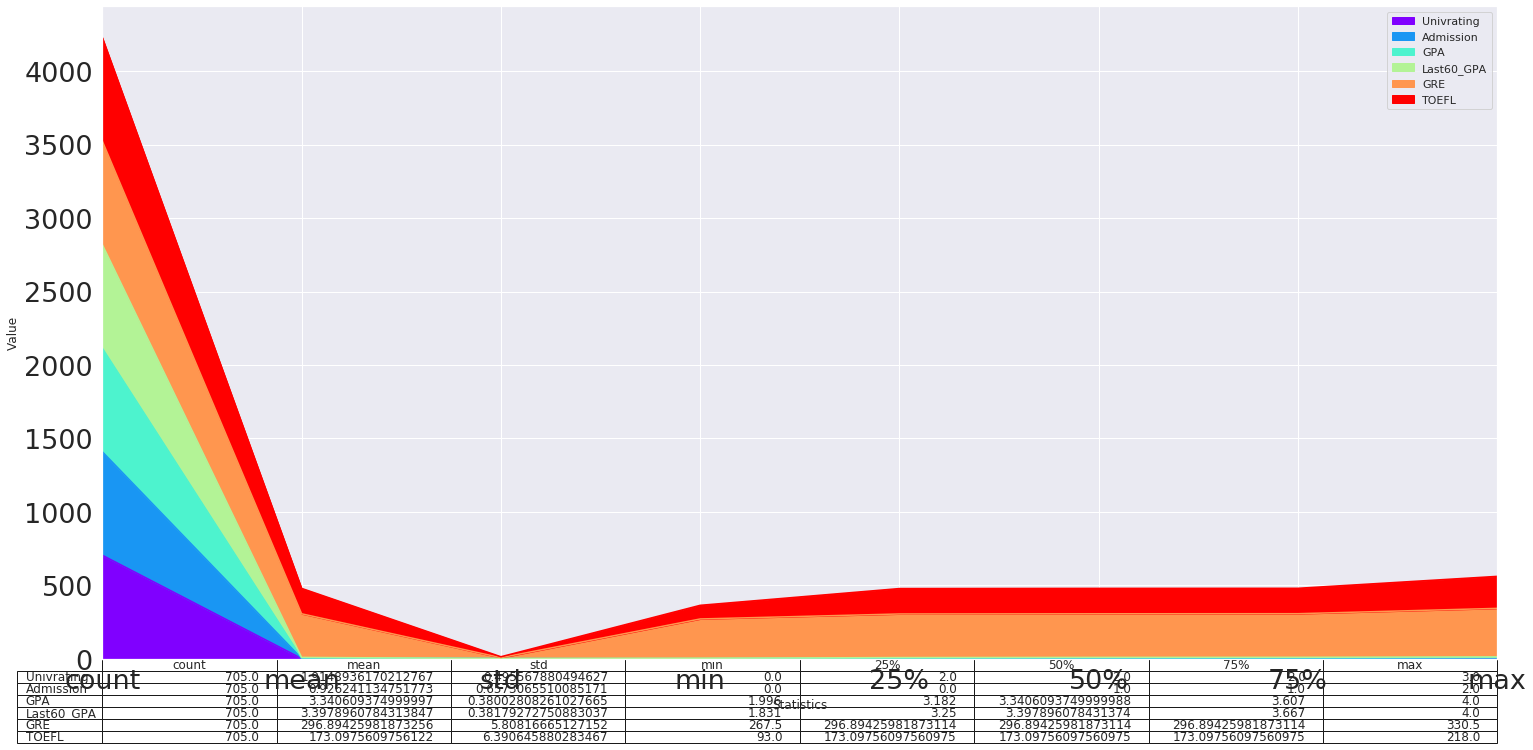

In [132]:
df2.describe().plot(kind = "area",fontsize=27, figsize = (25,12), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')

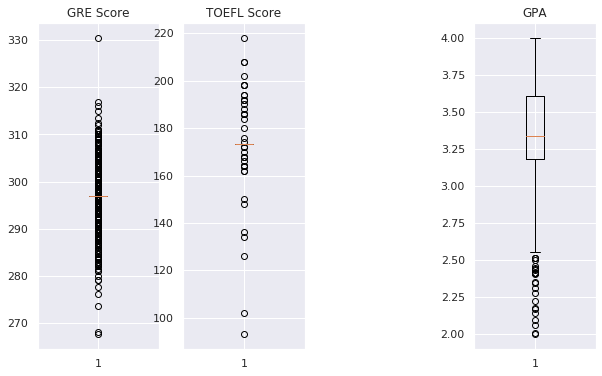

In [133]:
plt.figure(1, figsize=(10,6))
plt.subplot(1,4, 1)
plt.boxplot(df2['GRE'])
plt.title('GRE Score')

plt.subplot(1,4,2)
plt.boxplot(df2['TOEFL'])
plt.title('TOEFL Score')

plt.subplot(1,4,4)
plt.boxplot(df2['GPA'])
plt.title('GPA')

plt.show()

**Above plot shows the mean, median, min and max values of GRE, TOEFL and GPA**

## **Correlation Matrix**

**With the help of heatmap we can find the correlation between Admission and other parameters**

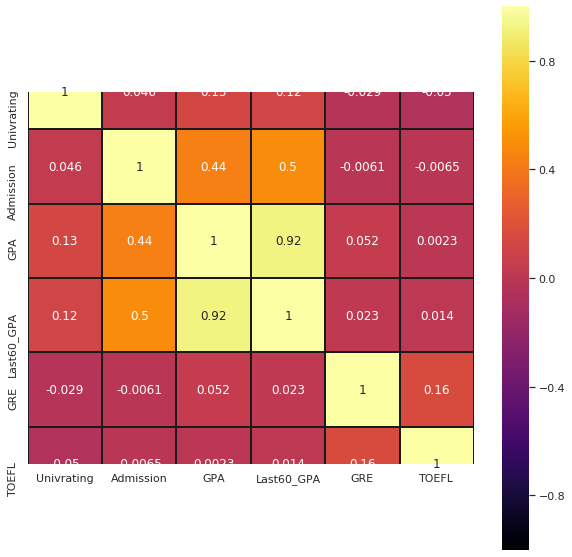

In [134]:
fig=plt.gcf()
fig.set_size_inches(10,10)
fig=sns.heatmap(df2.corr(),annot=True,cmap='inferno',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

**correlation values against admission are as shown below**

In [0]:
cor=a=df2.corr()['Admission']

In [136]:
cor

Univrating    0.046112
Admission     1.000000
GPA           0.444540
Last60_GPA    0.497608
GRE          -0.006106
TOEFL        -0.006532
Name: Admission, dtype: float64

**from the above correlation values we can see that GPA and university rating has highest effect on the admission**

## **Distribution plots**

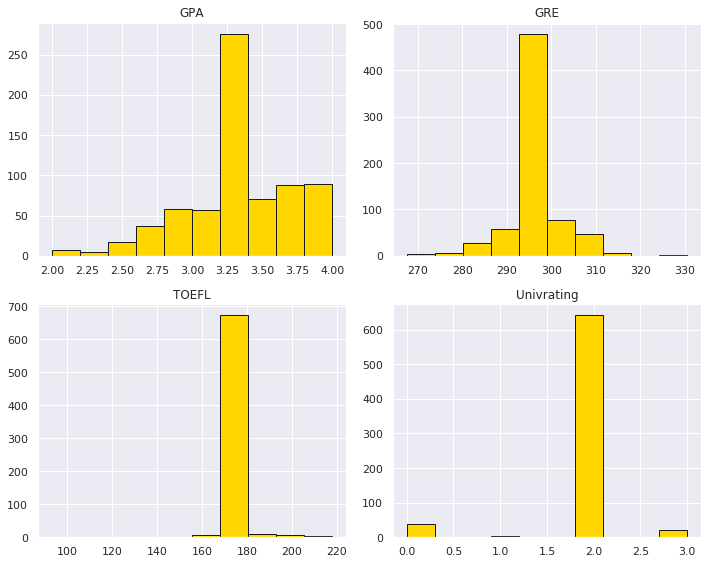

In [137]:
df2[['GRE','TOEFL','Univrating','GPA']].hist(figsize=(10,8),bins=10,color='#ffd700',linewidth='1',edgecolor='k')
plt.tight_layout()
plt.show()

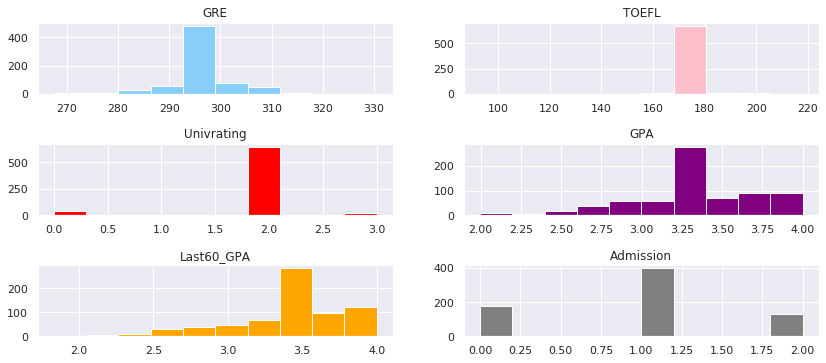

In [138]:
category = ['GRE','TOEFL','Univrating','GPA','Last60_GPA','Admission']
color = ['lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(3):
    
    if start == True:
        fig = plt.figure(figsize=(14,8))
        start = False
        
    plt.subplot2grid((4,2),(i,0))
    df2[category[2*i]].hist(color=color[2*i],bins=10)
    plt.title(category[2*i])
    plt.subplot2grid((4,2),(i,1))
    df2[category[2*i+1]].hist(color=color[2*i+1],bins=10)
    plt.title(category[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

In [139]:
print('Mean GPA Score is :',int(df2[df2['GPA']<=500].GPA.mean()))
print('Mean GRE Score is :',int(df2[df2['GRE']<=500].GRE.mean()))
print('Mean TOEFL Score is :',int(df2[df2['TOEFL']<=500].TOEFL.mean()))
print('Mean Last60_GPA is :',int(df2[df2['Last60_GPA']<=500].GPA.mean()))

Mean GPA Score is : 3
Mean GRE Score is : 296
Mean TOEFL Score is : 173
Mean Last60_GPA is : 3


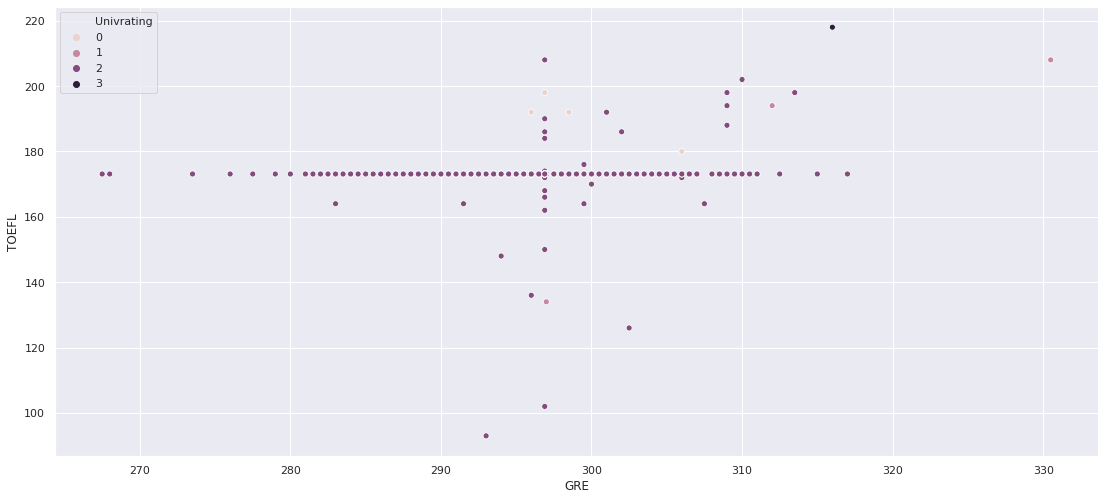

In [140]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.scatterplot(data=df2,x='GRE',y='TOEFL',hue='Univrating')

**From the above plot we can see that GRE and GPA of the students from NAAC A  and IIT are higher than the other students**

## **Requirement for the admission**

**In our data set we have stats for the students who got admitted into the university so we will analyse the data to see what will the average criteria to get an admission**

In [141]:
df2_sort=df2.sort_values(by=df2.columns[-1],ascending=False)
df2_sort.head()

,Univrating,Admission,GPA,Last60_GPA,GRE,TOEFL
9,3,1,3.340609,3.397896,316.00000,218.0
3,1,0,2.460000,2.574000,330.50000,208.0
667,2,0,2.178000,2.400000,296.89426,208.0
573,2,0,2.515000,2.626000,310.00000,202.0
35,0,1,3.239000,3.111000,296.89426,198.0


In [142]:
df2_sort[(df2_sort['Admission']==1)].mean().reset_index()

,index,0
0,Univrating,1.937028
1,Admission,1.000000
2,GPA,3.464380
3,Last60_GPA,3.516495
4,GRE,296.858885
5,TOEFL,172.824661


**From the above stats the qualifying criteria to get an admission can be GRE= 296, GPA=3.4, University Rating should be atleast NAAC B**

**Below Graphs show the distribution of gre, toefel and GPA based on the Admission and university rating**

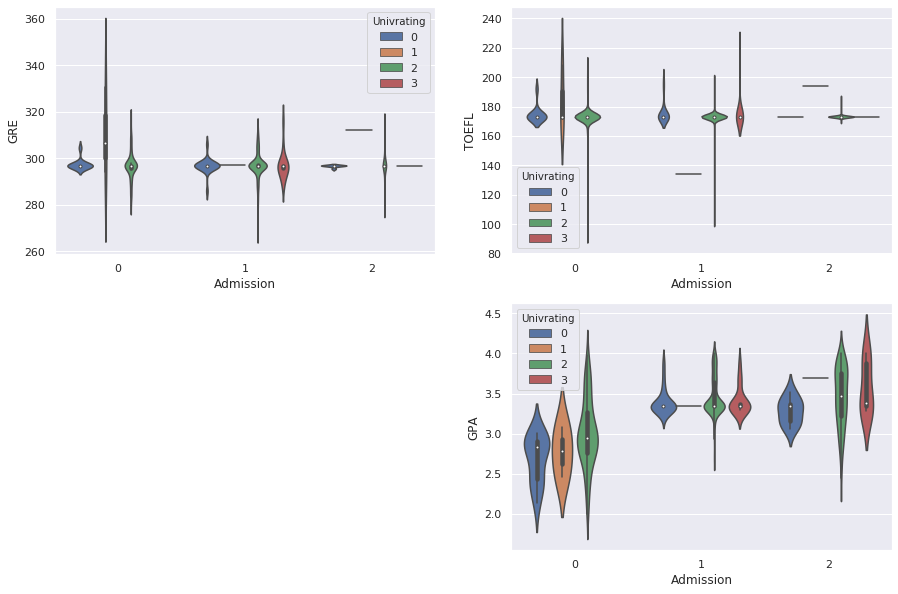

In [149]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot("Admission","GRE",hue="Univrating", data=df2)
plt.subplot(2,2,2)
sns.violinplot("Admission","TOEFL",hue="Univrating", data=df2)
plt.subplot(2,2,4)
sns.violinplot("Admission","GPA",hue="Univrating", data=df2)
